In [4]:
library(sf)
library(sp)
library(raster)
library(terra)
library(geobr)
library(mapview)

In [6]:
install.packages("geobr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
install.packages("mapview")

also installing the dependencies ‘geometries’, ‘jsonify’, ‘rapidjsonr’, ‘sfheaders’, ‘geojsonsf’, ‘crosstalk’, ‘leaflet.providers’, ‘brew’, ‘svglite’, ‘leafem’, ‘leaflet’, ‘leafpop’, ‘satellite’, ‘servr’


Warning message in install.packages("mapview"):
“installation of package ‘svglite’ had non-zero exit status”


In [5]:
##--função genérica para calcular NDVI, NDBI, NDWI
index <- function(img, k, i) {
  bk <- img[[k]]
  bi <- img[[i]]
  index <- (bk - bi) / (bk + bi)
  return(index)
}

In [6]:

##--Outro Exemplo usando usando Alvaraes--## 
##--Criando uma caixa de imagem para os municípios do AM 
am_muni <- geobr::read_municipality(code_muni = "AM", year = 2019, showProgress = FALSE)
bbox <- sf::st_bbox(am_muni[55,])
bbox <- sf::st_as_sfc(bbox)
silves <- sf::st_transform(bbox, crs = 31980)


Using year/date 2019



In [ ]:

Silves_landsat = rsi::get_landsat_imagery(
  silves,
  start_date = "2023-09-01",
  end_date = "2023-09-30",
  pixel_x_size = 60,
  pixel_y_size = 60,
  output_filename = tempfile(fileext = ".tif")
)

class      : RasterBrick 
dimensions : 1091, 1768, 1928888, 8  (nrow, ncol, ncell, nlayers)
resolution : 60, 60  (x, y)
extent     : 939086, 1045166, 9651114, 9716574  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=20 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
source     : silves_landsat.tif 
names      : A, B, G, R, N, S1, S2, T1 


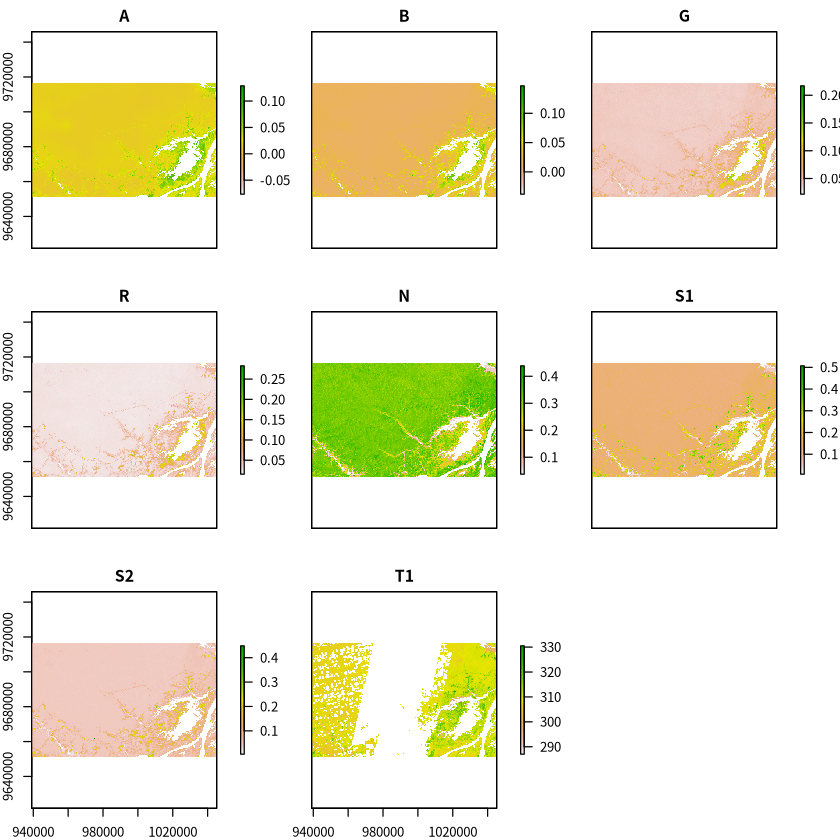

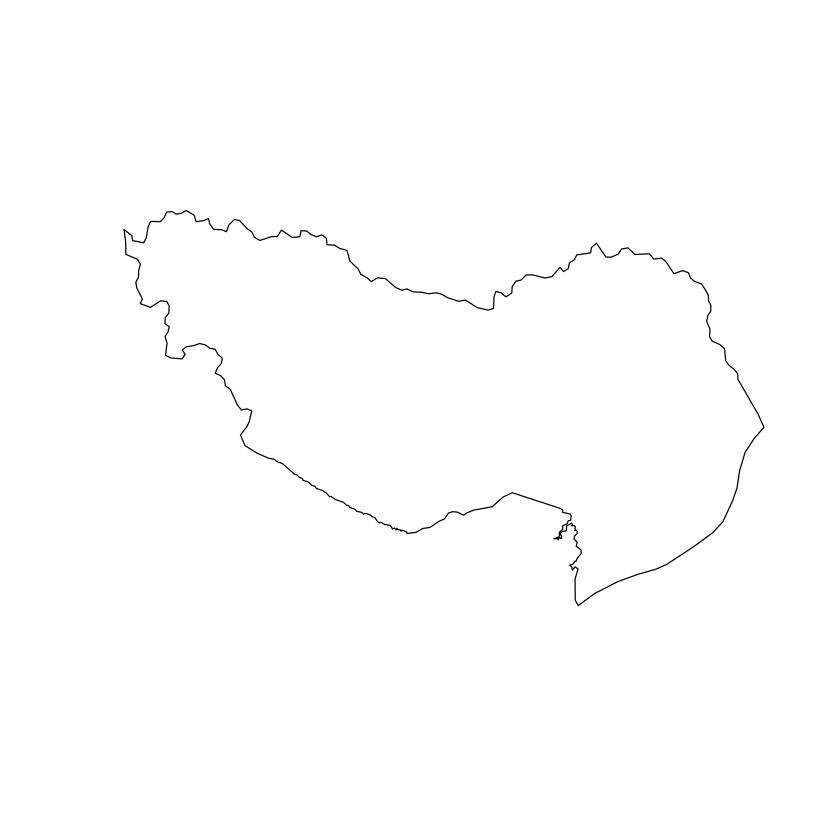

Warning message in rasterCheckSize(x, maxpixels = maxpixels):
“maximum number of pixels for Raster* viewing is 5e+05 ; 
the supplied Raster* has 1928888 
 ... decreasing Raster* resolution to 5e+05 pixels
 to view full resolution set 'maxpixels =  1928888 '”
Warning message in CPL_crs_from_input(x):
“GDAL Message 1: +init=epsg:XXXX syntax is deprecated. It might return a CRS with a non-EPSG compliant axis order.”


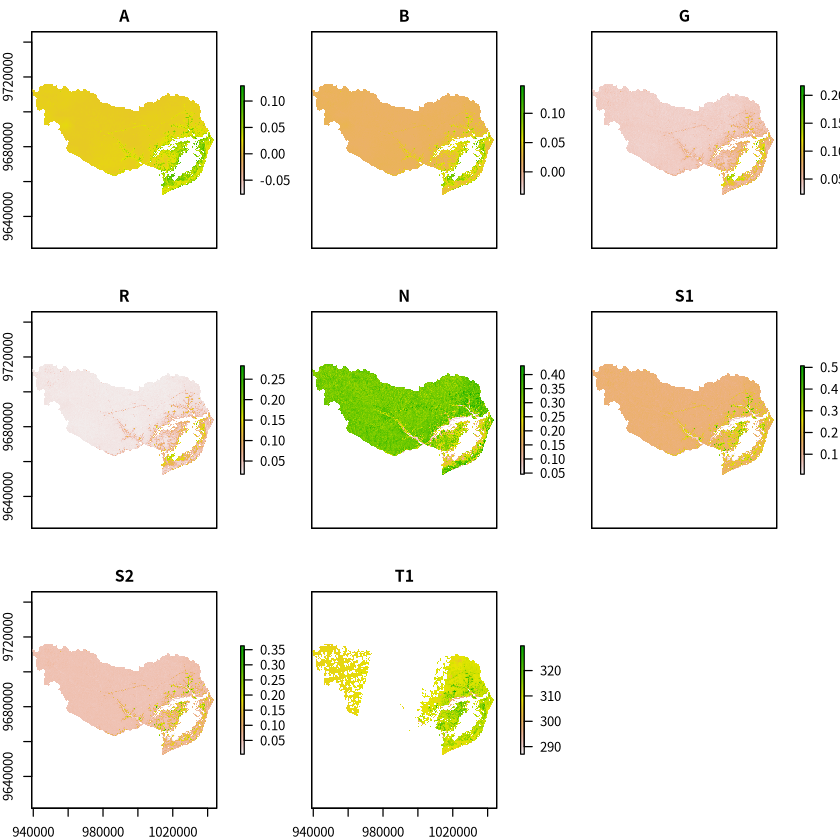

In [7]:

Silves_landsat <- "/home/huguinho/Documents/GitHub/introduction_to_geo_statistics/atividade_avaliativa/silves_landsat.tif"
silves_landsat_rast <- raster::brick(Silves_landsat)
silves_landsat_rast
plot(silves_landsat_rast)
map_silves <- sf::st_union(am_muni[55,]) |> sf::st_sf()
map_silves <- st_transform(map_silves, crs = 31980)
plot(map_silves)
silves_landsat_rast <- mask(silves_landsat_rast, map_silves)
plot(silves_landsat_rast)
mapview::viewRGB(silves_landsat_rast, r=7, g=6, b=4, na.col="transparent")

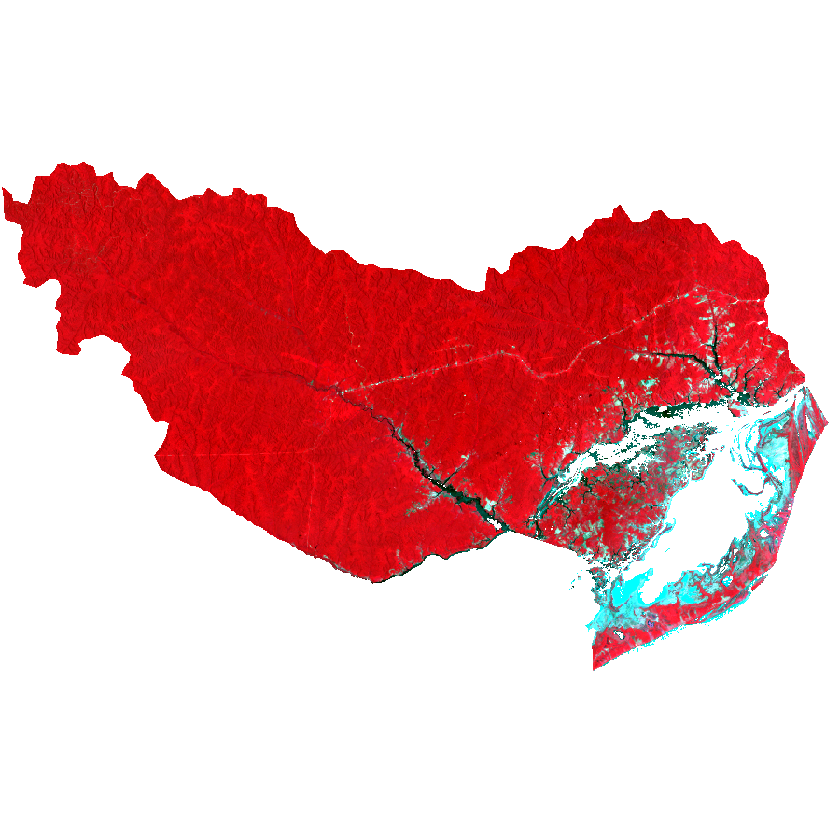

In [10]:

plotRGB(silves_landsat_rast, r=5, g=4, b=3, stretch="lin")
ndbi <- index(silves_landsat_rast, 6, 5)

In [11]:
View(ndbi)

class      : RasterLayer 
dimensions : 1091, 1768, 1928888  (nrow, ncol, ncell)
resolution : 60, 60  (x, y)
extent     : 939086, 1045166, 9651114, 9716574  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=20 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
source     : memory
names      : layer 
values     : -0.9020404, 0.3615322  (min, max)


class      : RasterLayer 
dimensions : 1091, 1768, 1928888  (nrow, ncol, ncell)
resolution : 60, 60  (x, y)
extent     : 939086, 1045166, 9651114, 9716574  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=20 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
source     : memory
names      : layer 
values     : -0.9020404, 0.3615322  (min, max)


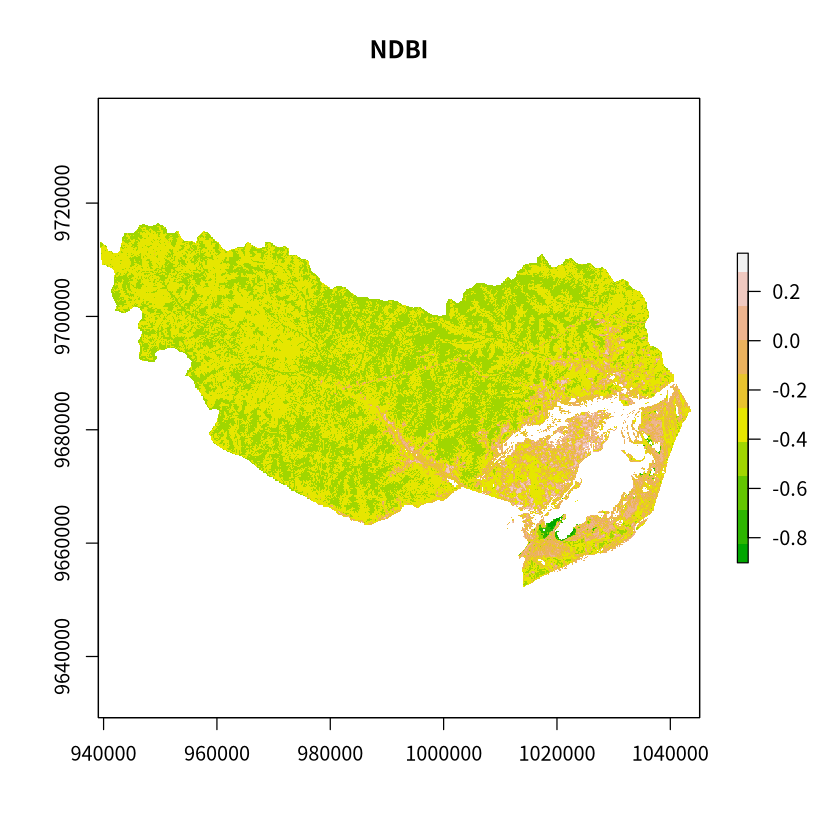

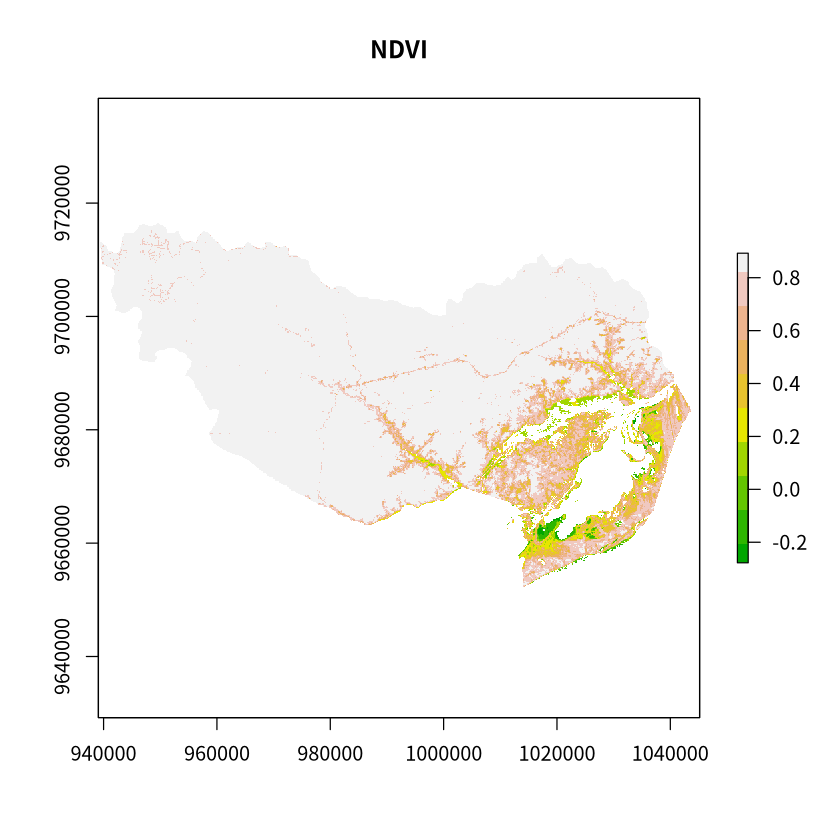

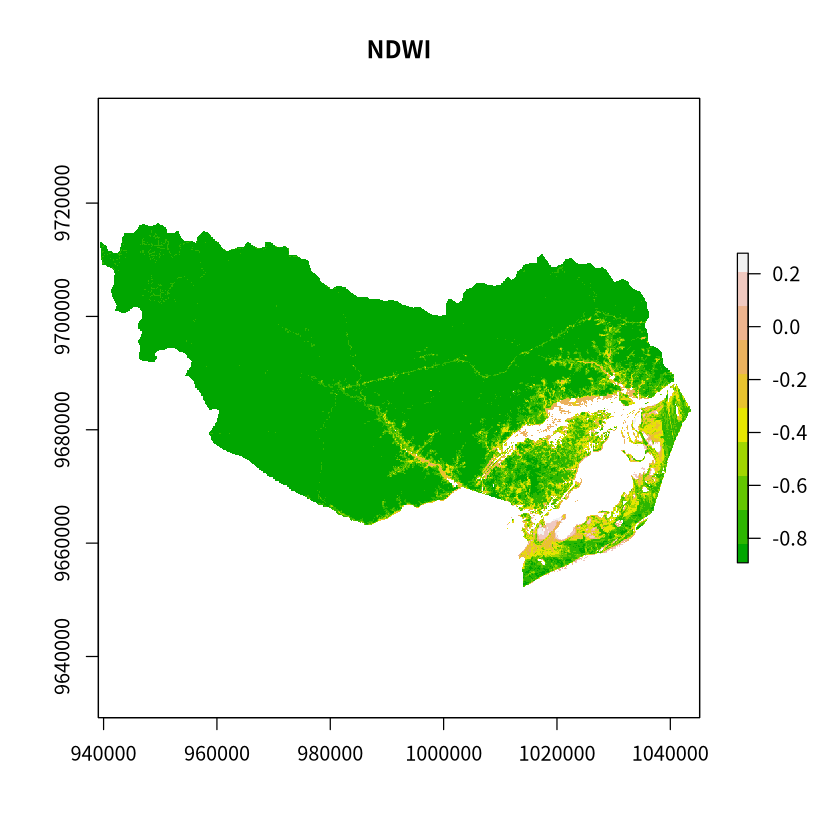

In [13]:
View(ndbi)
plot(ndbi, main = "NDBI", col = terrain.colors(10))
ndvi <- index(silves_landsat_rast, 5, 4)
plot(ndvi, main = "NDVI", col = terrain.colors(10))
ndwi <- index(silves_landsat_rast, 4, 5)
plot(ndwi, main = "NDWI", col = terrain.colors(10))
ndwi <- index(silves_landsat_rast, 4, 5)